In [1]:
# from reader import load_dataframe
import pandas as pd
import json
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# 2018 air_traffic data.
# Doestic passenger count (enplanements) US airlines
passenger_count = pd.read_excel('air_traffic.xlsx', 'table14', header = 3, skipfooter = 2 )
passenger_count.to_csv("passenger_count.csv")

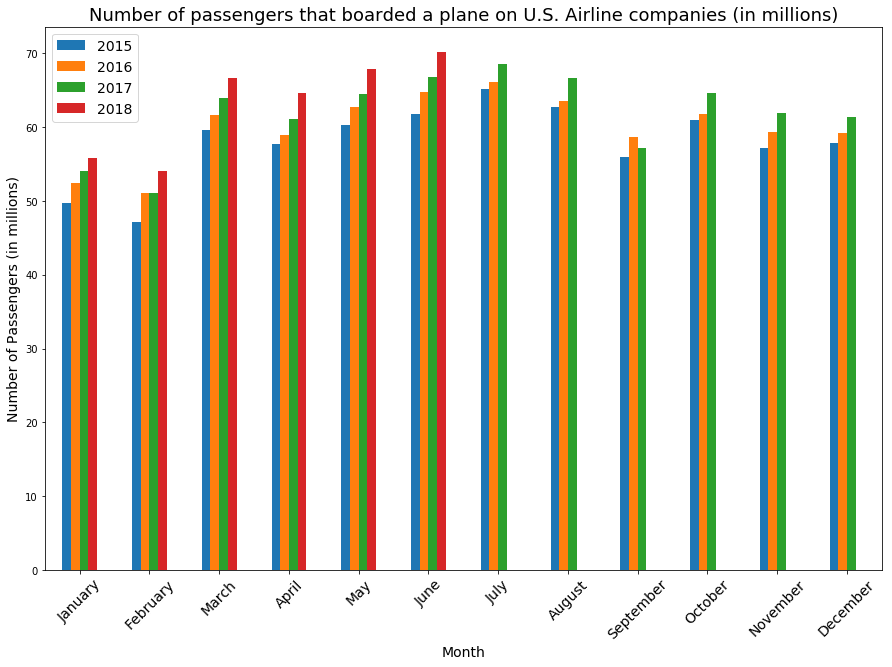

In [3]:
passenger_count_month = passenger_count.drop(['6 Mo. Total', 'Yr. Total'])

passenger_count_month.plot(kind='bar', figsize=(15,10))
plt.title('Number of passengers that boarded a plane on U.S. Airline companies (in millions)', fontsize=18)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Number of Passengers (in millions)", fontsize = 14)
plt.xticks(fontsize= 14, rotation =45)
plt.legend(fontsize=14)
plt.show()

In [4]:
popular = pd.read_csv("consumer_airfare.csv")
popular

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.2900,131.05,FL,0.2900,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.6300,194.71,NJ,0.2600,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.5100,144.28,B6,0.1500,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.7400,224.77,TZ,0.1100,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.4700,262.43,AS,0.2700,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"
5,1998,4,31267,31703,"Dayton, OH","New York City, NY (Metropolitan Area)",590,238,205.16,CO,0.4000,203.97,CO,0.4000,203.97,1,"Dayton, OH\n(39.760982, -84.192203)","New York City, NY (Metropolitan Area)\n(40.123..."
6,2010,1,32575,33244,"Los Angeles, CA (Metropolitan Area)","Memphis, TN",1619,340,246.90,DL,0.3200,292.80,US,0.2100,195.44,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Memphis, TN\n(35.143378, -90.052136)"
7,1996,3,31057,30198,"Charlotte, NC","Pittsburgh, PA",366,157,244.04,US,0.9300,247.30,DL,0.0200,148.87,1,"Charlotte, NC\n(35.222936, -80.840161)","Pittsburgh, PA\n(40.442169, -79.994945)"
8,2009,2,32211,32467,"Las Vegas, NV","Miami, FL (Metropolitan Area)",2175,1224,200.95,AA,0.3200,227.52,NK,0.1300,134.62,1,"Las Vegas, NV\n(36.169202, -115.140597)","Miami, FL (Metropolitan Area)\n(44.977479, -93..."
9,2012,4,30994,31453,"Charleston, SC","Houston, TX",928,161,242.19,WN,0.3900,221.00,WN,0.3900,221.00,1,"Charleston, SC\n(32.77647, -79.931027)","Houston, TX\n(29.760803, -95.369506)"


In [5]:
popular.sort_values(by=['passengers'],  ascending=False)

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
63758,2000,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,25471,92.03,WN,0.5300,83.63,WN,0.5300,83.63,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
72934,2000,3,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,23966,92.04,WN,0.5400,84.52,WN,0.5400,84.52,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
17662,2000,4,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,23908,92.47,WN,0.5400,84.10,WN,0.5400,84.10,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
15778,1999,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,22991,84.85,WN,0.5400,76.91,WN,0.5400,76.91,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
52909,2001,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,22954,93.34,WN,0.5700,85.61,WN,0.5700,85.61,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
76334,2017,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,22488,136.39,WN,0.5868,138.82,WN,0.5868,138.82,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
85395,2017,3,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,22211,122.40,WN,0.5800,124.58,WN,0.5800,124.58,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
83205,2016,4,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,22125,136.81,WN,0.6132,137.28,WN,0.6132,137.28,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
1354,2007,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,21959,105.55,WN,0.6500,100.12,WN,0.6500,100.12,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."
87815,2018,1,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,21463,119.57,WN,0.5791,124.08,WN,0.5791,124.08,-1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780..."


In [6]:
#Fare data for LA to SanFran
LA_SF = popular[(popular.city1 == "Los Angeles, CA (Metropolitan Area)") & (popular.city2 == "San Francisco, CA (Metropolitan Area)")].sort_values(by=['Year', 'quarter'])
LA_SF['Q_yr'] =  LA_SF['Year'].astype(str)  + "Q" + LA_SF['quarter'].astype(str)
LA_SF['Q_yr'] = pd.to_datetime(LA_SF['Q_yr'].str.replace(' ', '')) + pd.offsets.QuarterEnd(0)

LA_SF

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,Q_yr
42632,1996,1,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,14330,82.22,UA,0.4400,90.37,WN,0.3700,73.18,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1996-03-31
51045,1996,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,17326,82.23,UA,0.4200,91.21,WN,0.3900,71.55,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1996-06-30
36586,1996,3,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,16209,80.86,UA,0.4200,90.07,WN,0.4000,71.50,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1996-09-30
46716,1996,4,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,13833,82.79,UA,0.4700,88.02,WN,0.3600,76.48,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1996-12-31
33177,1997,1,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,13362,85.64,UA,0.4100,94.22,QQ,0.1100,78.12,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1997-03-31
20779,1997,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,19129,80.05,WN,0.4600,70.74,WN,0.4600,70.74,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1997-06-30
9599,1997,3,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,19975,79.50,WN,0.4800,69.74,WN,0.4800,69.74,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1997-09-30
37622,1997,4,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,18077,81.82,WN,0.4700,72.56,WN,0.4700,72.56,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1997-12-31
18246,1998,1,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,14580,89.47,WN,0.4200,80.56,WN,0.4200,80.56,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1998-03-31
16547,1998,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,16024,88.85,WN,0.4300,81.73,QQ,0.1000,81.27,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","San Francisco, CA (Metropolitan Area)\n(37.780...",1998-06-30


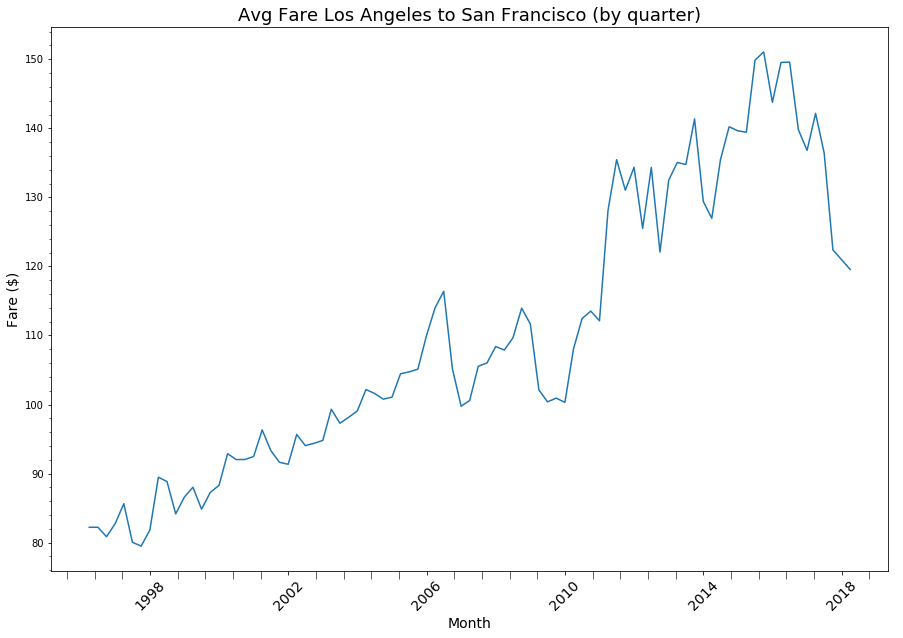

In [7]:
# LA_SF['fare'].plot(kind='line', figsize=(15,10))
plt.figure(figsize=(15,10))
x=LA_SF['Q_yr']
y = LA_SF['fare']
plt.plot(x,y)
plt.title('Avg Fare Los Angeles to San Francisco (by quarter)', fontsize=18)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Fare ($)", fontsize = 14)
# plt.xlim(1996, 2018)
# plt.ylim(50,200)
plt.xticks(fontsize= 14, rotation =45)
plt.minorticks_on()
plt.tick_params(axis="x", which='minor', length=8)

# plt.legend(fontsize=14)
plt.show()

In [8]:
#flights departing from denver
den_origin = popular[popular['city1'].str.contains("Denver")].sort_values(by=['passengers'], ascending = False )
den_origin

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
84867,2015,3,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,6071,153.31,WN,0.4525,149.93,F9,0.1935,110.23,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
76587,2017,3,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5856,140.87,WN,0.4465,146.58,AA,0.1052,119.98,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
84665,2017,2,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5853,149.33,WN,0.4389,157.84,WN,0.4389,157.84,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
80255,2016,3,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5789,152.21,WN,0.4775,149.43,F9,0.1173,90.86,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
82565,2016,2,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5430,155.19,WN,0.4857,156.53,F9,0.1378,84.83,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
86186,2015,4,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5387,161.51,WN,0.4820,159.23,F9,0.1578,100.99,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
84373,2016,4,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5273,153.62,WN,0.4687,152.48,WN,0.4687,152.48,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
86290,2017,1,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5176,147.48,WN,0.4305,152.58,WN,0.4305,152.58,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
26742,2014,3,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5145,172.32,WN,0.4100,169.93,F9,0.2500,131.88,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
87128,2018,1,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5108,142.50,WN,0.4457,139.27,WN,0.4457,139.27,-1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."


In [34]:
# pass_count = den_origin.groupby(['city2','Geocoded_City2'])['passengers'].sum()
# pass_count
# pass_count.to_csv("passenger_count_bycity.csv")


In [27]:
den_origin.Geocoded_City2.str.split('\n').str[-1]

84867    (34.052238, -118.243344)
76587    (34.052238, -118.243344)
84665    (34.052238, -118.243344)
80255    (34.052238, -118.243344)
82565    (34.052238, -118.243344)
86186    (34.052238, -118.243344)
84373    (34.052238, -118.243344)
86290    (34.052238, -118.243344)
26742    (34.052238, -118.243344)
87128    (34.052238, -118.243344)
11694    (34.052238, -118.243344)
76225    (34.052238, -118.243344)
61670    (34.052238, -118.243344)
85915    (34.052238, -118.243344)
77554     (37.78008, -122.420168)
44966    (34.052238, -118.243344)
65327    (34.052238, -118.243344)
246      (34.052238, -118.243344)
85260     (37.78008, -122.420168)
39330    (34.052238, -118.243344)
59303    (34.052238, -118.243344)
78335     (40.123164, -75.333718)
61885    (34.052238, -118.243344)
69560    (34.052238, -118.243344)
45105    (34.052238, -118.243344)
40050    (34.052238, -118.243344)
36823    (34.052238, -118.243344)
23905    (34.052238, -118.243344)
76336    (34.052238, -118.243344)
78223     (37.

In [28]:
#extract lat/long values
den_origin['city2_geo'] = den_origin.Geocoded_City2.str.split('\n', expand=False).str[-1]
den_origin

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,city2_geo
84867,2015,3,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,6071,153.31,WN,0.4525,149.93,F9,0.1935,110.23,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
76587,2017,3,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5856,140.87,WN,0.4465,146.58,AA,0.1052,119.98,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
84665,2017,2,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5853,149.33,WN,0.4389,157.84,WN,0.4389,157.84,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
80255,2016,3,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5789,152.21,WN,0.4775,149.43,F9,0.1173,90.86,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
82565,2016,2,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5430,155.19,WN,0.4857,156.53,F9,0.1378,84.83,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
86186,2015,4,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5387,161.51,WN,0.4820,159.23,F9,0.1578,100.99,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
84373,2016,4,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5273,153.62,WN,0.4687,152.48,WN,0.4687,152.48,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
86290,2017,1,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5176,147.48,WN,0.4305,152.58,WN,0.4305,152.58,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
26742,2014,3,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5145,172.32,WN,0.4100,169.93,F9,0.2500,131.88,1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"
87128,2018,1,30325,32575,"Denver, CO","Los Angeles, CA (Metropolitan Area)",862,5108,142.50,WN,0.4457,139.27,WN,0.4457,139.27,-1,"Denver, CO\n(39.738453, -104.984853)","Los Angeles, CA (Metropolitan Area)\n(34.05223...","(34.052238, -118.243344)"


In [42]:
#passenger count from Denver by destination with geo point
pass_count = den_origin[['city2', 'passengers', 'city2_geo']]
pass_count = pass_count.groupby(['city2','city2_geo'])['passengers'].sum()
pass_count.reset_index()
# pass_count.to_csv('passCount_geo.csv')

,city2,city2_geo,passengers
0,"Des Moines, IA","(41.588822, -93.620309)",9526
1,"Detroit, MI","(42.332916, -83.047853)",70785
2,"Durango, CO","(37.28225, -107.877762)",682
3,"El Paso, TX","(31.76006, -106.492257)",3758
4,"Fargo, ND","(36.731654, -119.785856)",871
5,"Fort Myers, FL","(40.253979, -103.801495)",15418
6,"Fresno, CA","(36.731654, -119.785856)",334
7,"Grand Rapids, MI","(47.925705, -97.036068)",9028
8,"Greensboro/High Point, NC","(36.072701, -79.793899)",1089
9,"Harrisburg, PA","(40.259572, -76.881821)",908
